In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# 데이터 확인

In [2]:
df = pd.read_csv('./data/train_transaction.csv')
test = pd.read_csv('./data/test_transaction.csv')

In [3]:
test

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,3663549,18403224,31.950,W,10409,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3663550,18403263,49.000,W,4272,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3663551,18403310,171.000,W,4476,574.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3663552,18403310,284.950,W,10989,360.0,150.0,visa,166.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3663553,18403317,67.950,W,18018,452.0,150.0,mastercard,117.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3664544,18462411,39.839,C,6019,583.0,150.0,visa,226.0,credit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,3664545,18462415,49.000,W,5556,483.0,150.0,mastercard,195.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,3664546,18462434,209.950,W,17188,321.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
998,3664547,18462438,209.950,W,18178,598.0,150.0,mastercard,224.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,C14,M1,M2,M3,M4,M5,M6,M7,M8,M9
0,2987000,0,86400,68.500,W,13926,NaN,150.0,discover,142.0,...,1.0,T,T,T,M2,F,T,NaN,NaN,NaN
1,2987001,0,86401,29.000,W,2755,404.0,150.0,mastercard,102.0,...,1.0,NaN,NaN,NaN,M0,T,T,NaN,NaN,NaN
2,2987002,0,86469,59.000,W,4663,490.0,150.0,visa,166.0,...,1.0,T,T,T,M0,F,F,F,F,F
3,2987003,0,86499,50.000,W,18132,567.0,150.0,mastercard,117.0,...,1.0,NaN,NaN,NaN,M0,T,F,NaN,NaN,NaN
4,2987004,0,86506,50.000,H,4497,514.0,150.0,mastercard,102.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,3086995,0,2005989,55.385,C,2256,545.0,185.0,visa,226.0,...,1.0,NaN,NaN,NaN,M2,NaN,NaN,NaN,NaN,NaN
99996,3086996,0,2006074,117.000,W,2518,555.0,150.0,visa,226.0,...,2.0,NaN,NaN,NaN,M0,F,F,NaN,NaN,NaN
99997,3086997,0,2006135,50.000,S,2748,111.0,150.0,visa,228.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99998,3086998,0,2006177,100.000,H,16075,514.0,150.0,mastercard,102.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.columns

Index(['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt',
       'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6',
       'P_emaildomain', 'R_emaildomain', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6',
       'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'M1', 'M2', 'M3',
       'M4', 'M5', 'M6', 'M7', 'M8', 'M9'],
      dtype='object')

In [6]:
# 불필요한 변수라 판단하여 삭제
df.drop(['TransactionID', 'TransactionDT'], axis = 1, inplace = True)

# EDA & 데이터 전처리

## 탐색

In [7]:
df.head()

,isFraud,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,P_emaildomain,...,C14,M1,M2,M3,M4,M5,M6,M7,M8,M9
0,0,68.5,W,13926,NaN,150.0,discover,142.0,credit,NaN,...,1.0,T,T,T,M2,F,T,NaN,NaN,NaN
1,0,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,gmail.com,...,1.0,NaN,NaN,NaN,M0,T,T,NaN,NaN,NaN
2,0,59.0,W,4663,490.0,150.0,visa,166.0,debit,outlook.com,...,1.0,T,T,T,M0,F,F,F,F,F
3,0,50.0,W,18132,567.0,150.0,mastercard,117.0,debit,yahoo.com,...,1.0,NaN,NaN,NaN,M0,T,F,NaN,NaN,NaN
4,0,50.0,H,4497,514.0,150.0,mastercard,102.0,credit,gmail.com,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 라벨 탐색 - 클래스 불균형


In [8]:
# 97.4%의 클래스 불균형을 가진다.
print(df['isFraud'].value_counts()), print(df['isFraud'].value_counts(normalize=True) * 100)

0    97439
1     2561
Name: isFraud, dtype: int64
0    97.439
1     2.561
Name: isFraud, dtype: float64


(None, None)

### 특징별 상태 공간 확인

In [9]:
for col in df.columns:
    print(f'---변수 : {col} ---------------------------------------------------------------------')
    print("타입: {}, 결측 개수: {}, 상태공간 크기: {}, 상태공간 일부: {}".format(df[col].dtype, df[col].isnull().sum(), len(df[col].unique()), df[col].unique()))

---변수 : isFraud ---------------------------------------------------------------------
타입: int64, 결측 개수: 0, 상태공간 크기: 2, 상태공간 일부: [0 1]
---변수 : TransactionAmt ---------------------------------------------------------------------
타입: float64, 결측 개수: 0, 상태공간 크기: 6387, 상태공간 일부: [ 68.5    29.     59.    ... 138.288 136.364  28.858]
---변수 : ProductCD ---------------------------------------------------------------------
타입: object, 결측 개수: 0, 상태공간 크기: 5, 상태공간 일부: ['W' 'H' 'C' 'S' 'R']
---변수 : card1 ---------------------------------------------------------------------
타입: int64, 결측 개수: 0, 상태공간 크기: 7677, 상태공간 일부: [13926  2755  4663 ... 14801  2055 12478]
---변수 : card2 ---------------------------------------------------------------------
타입: float64, 결측 개수: 1354, 상태공간 크기: 500, 상태공간 일부: [ nan 404. 490. 567. 514. 555. 360. 100. 111. 352. 375. 418. 303. 314.
 543. 583. 148. 321. 269. 361. 272. 399. 569. 453. 417. 512. 545. 266.
 114. 481. 452. 547. 383. 170. 343. 556. 285. 562. 302. 264. 558. 500.
 3

### 범주형 변수 탐색

- ProductCD

In [11]:
df['ProductCD'].isnull().sum()

0

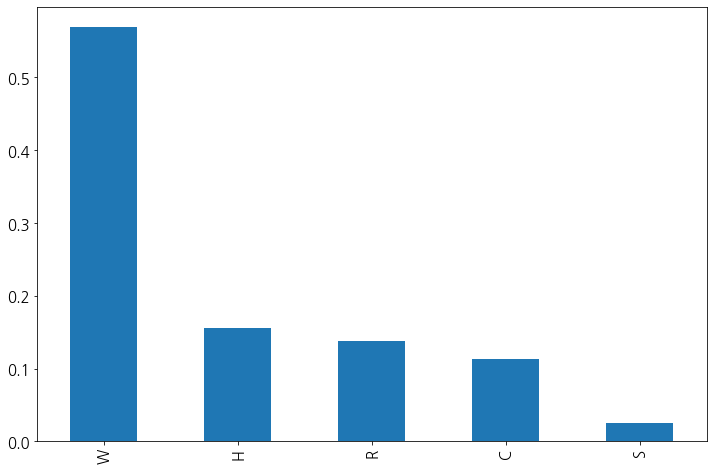

In [20]:
df['ProductCD'].value_counts(normalize=True).plot(kind='bar', fontsize=15)
plt.gcf().set_size_inches(12, 8)
plt.show()

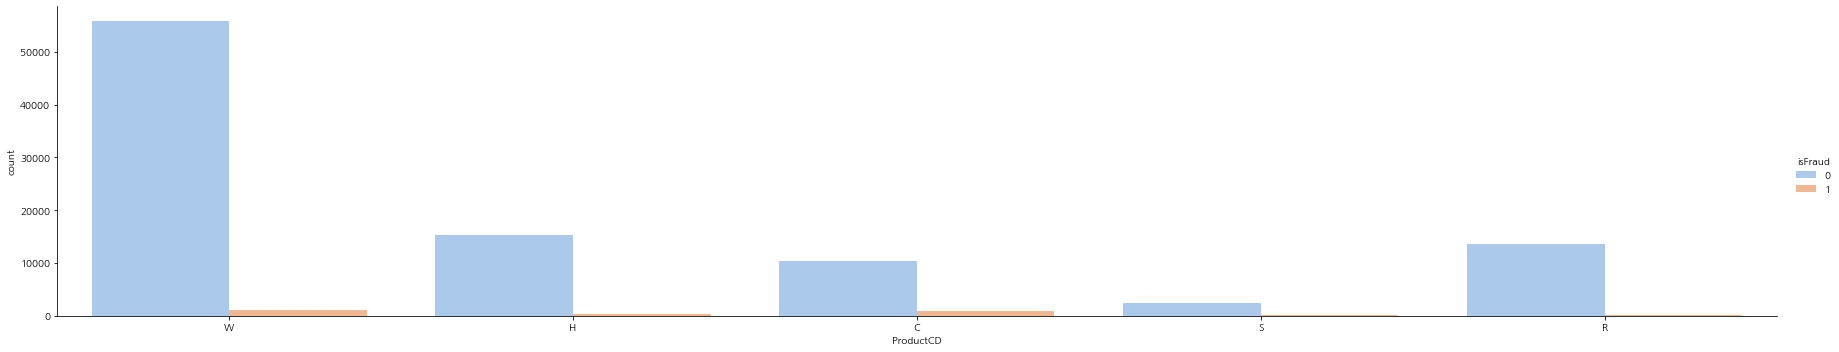

In [30]:
sns.catplot(data=df, x='ProductCD', hue='isFraud', kind='count', palette='pastel', aspect=5)
plt.show()

In [33]:
df.groupby('ProductCD')['isFraud'].mean().sort_values(ascending=False) * 100

ProductCD
C    8.783367
S    2.335709
H    1.977965
W    1.846056
R    1.078403
Name: isFraud, dtype: float64

- card4

In [34]:
df['card4'].isnull().sum()

7

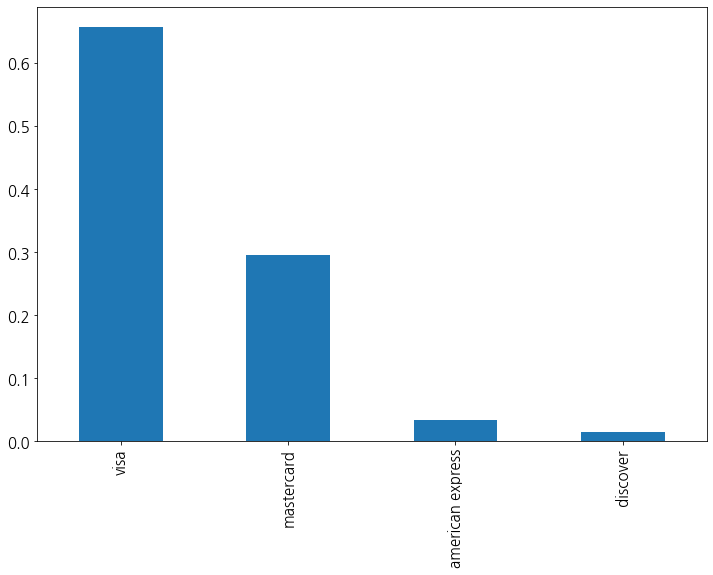

In [35]:
df['card4'].value_counts(normalize=True).plot(kind='bar', fontsize=15)
plt.gcf().set_size_inches(12, 8)
plt.show()

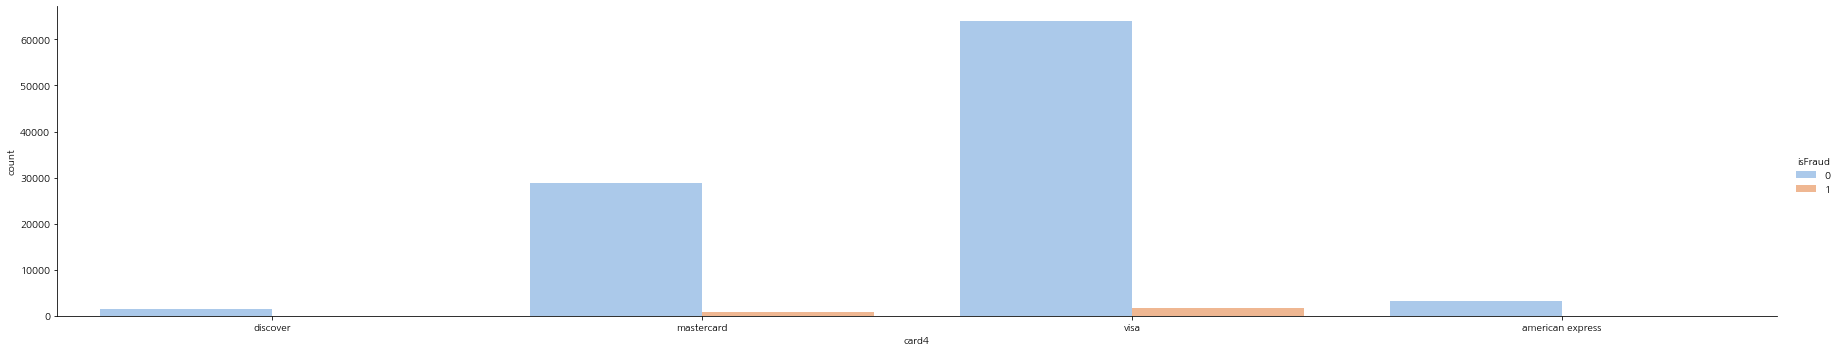

In [36]:
sns.catplot(data=df, x='card4', hue='isFraud', kind='count', palette='pastel', aspect=5)
plt.show()

In [38]:
df.groupby('card4')['isFraud'].mean().sort_values(ascending=False) * 100

card4
mastercard          2.881854
discover            2.530780
visa                2.486205
american express    1.141141
Name: isFraud, dtype: float64

- card6

In [39]:
df['card6'].isnull().sum()

4

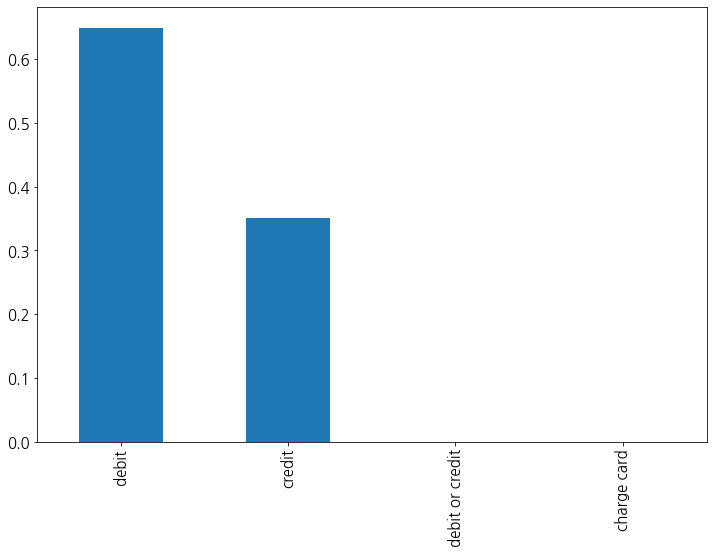

In [41]:
df['card6'].value_counts(normalize=True).plot(kind='bar', fontsize=15)
plt.gcf().set_size_inches(12, 8)
plt.show()

In [45]:
df.groupby('card6')['isFraud'].mean().sort_values(ascending=False) * 100

card6
credit             3.599236
debit              1.997751
charge card        0.000000
debit or credit    0.000000
Name: isFraud, dtype: float64

In [47]:
df['card6'].value_counts(normalize=False)

debit              64923
credit             35063
debit or credit        7
charge card            3
Name: card6, dtype: int64

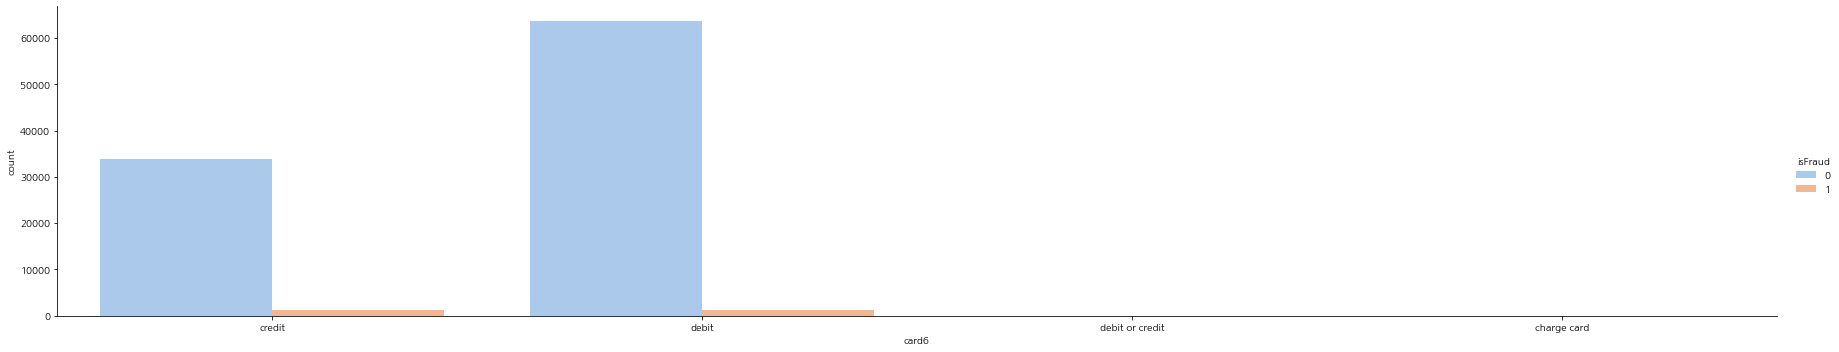

In [46]:
sns.catplot(data=df, x='card6', hue='isFraud', kind='count', palette='pastel', aspect=5)
plt.show()

- e-mail 관련

In [48]:
df['P_emaildomain'].value_counts()

gmail.com           36290
yahoo.com           15883
anonymous.com        8663
hotmail.com          8119
aol.com              4866
comcast.net          1856
icloud.com            894
msn.com               852
outlook.com           767
att.net               694
sbcglobal.net         671
verizon.net           626
live.com              501
bellsouth.net         440
cox.net               376
me.com                373
ymail.com             369
yahoo.com.mx          292
charter.net           233
optonline.net         212
live.com.mx           133
mac.com               122
rocketmail.com        110
earthlink.net          98
mail.com               76
embarqmail.com         70
roadrunner.com         68
juno.com               66
outlook.es             60
gmail                  60
twc.com                54
windstream.net         54
frontier.com           49
hotmail.es             47
frontiernet.net        42
netzero.com            41
q.com                  41
cfl.rr.com             39
web.de      

In [49]:
df['R_emaildomain'].value_counts()

gmail.com           13024
anonymous.com        6954
hotmail.com          5422
yahoo.com            3222
aol.com              1327
comcast.net           783
outlook.com           438
icloud.com            318
msn.com               308
yahoo.com.mx          291
verizon.net           260
sbcglobal.net         235
cox.net               214
bellsouth.net         185
me.com                184
live.com              173
att.net               162
live.com.mx           133
ymail.com              79
optonline.net          72
mac.com                66
outlook.es             59
hotmail.es             47
mail.com               42
charter.net            41
web.de                 38
prodigy.net.mx         36
hotmail.fr             32
earthlink.net          30
embarqmail.com         30
frontier.com           28
juno.com               26
yahoo.fr               24
windstream.net         22
gmx.de                 20
roadrunner.com         19
rocketmail.com         18
cfl.rr.com             18
q.com       

### 연속형 변수 탐색